# Self-Organizing Map Example

This notebook demonstrates training a Self-Organizing Map (SOM) on toy data and visualizing the results.

In [12]:
from self_organizing_maps.classes.som_config import SOMConfig
from self_organizing_maps.classes.self_organizing_map import SelfOrganizingMap
from utils import make_toy_blobs, plot_codebook_over_data, plot_occupancy_map

In [9]:
# Generate toy dataset
X = make_toy_blobs(seed=42)

# Initialize configuration object
cfg = SOMConfig(
    n_rows=15,
    n_cols=15,
    input_vector_dim=2,
    initial_learning_rate=0.5,
    initial_neighborhood_radius=6.0,
    n_iter=4000,
    rnd_seed=0,
)

# Initialize and train SOM
som = SelfOrganizingMap(cfg).fit(X)

## Codebooks

In a SOM, the **codebook** refers to the collection of weight vectors associated with each neuron in the map. Each neuron has a weight / codebook vector that represents a learned prototype or reference point in the input data space.

During training, the SOM learns to position these codebook vectors such that:
- Similar input data points are mapped to nearby neurons (topological preservation)
- The codebook vectors approximate the distribution of the input data
- Each codebook vector acts as a representative "centroid" for a region of the input space

The codebook essentially forms a discrete, low-dimensional representation of the continuous input data. When you visualize the codebook vectors over the data, you can see how the SOM has organized the data space. The codebook vectors should roughly follow the structure and density of the input data, creating a compressed but meaningful representation of the original dataset.

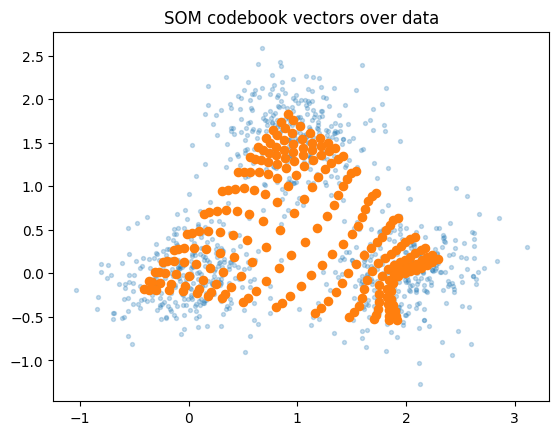

In [10]:
# Visualize codebook vectors over data
plot_codebook_over_data(X, som)

## Occupancy maps

An **occupancy map** (also called a hit histogram or activation map) visualizes how many input data points are mapped to each neuron in the Self-Organizing Map. Each cell in the occupancy map represents a neuron, and its value indicates the count of data points whose Best Matching Unit (BMU) is that neuron.

The occupancy map reveals important information about the SOM:
- **Data density**: Regions with high occupancy correspond to areas of high data density in the input space
- **Neuron utilization**: Some neurons may have zero occupancy (never selected as BMU), indicating they're positioned in sparse regions of the data space
- **Clustering structure**: Clusters of high-occupancy neurons reveal natural groupings in the data
- **Map quality**: A well-trained SOM should show relatively uniform occupancy (all neurons used roughly equally), though this depends on the data distribution

In the visualization below, brighter colors indicate higher occupancy which means more data points mapped to those neurons. This helps understand how the SOM has organized and partitioned the input data space.

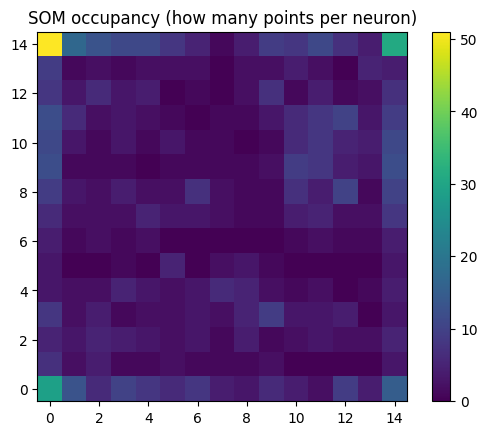

In [11]:
# Visualize occupancy map
occupancy_map = som.occupancy(X)
plot_occupancy_map(occupancy_map)